# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rivandi Mizwar
- **Email:** rivandimizwar@gmail.com
- **ID Dicoding:** rivandimizwar

## Menentukan Pertanyaan Bisnis

- Bagaimana pola peminjaman sepeda berdasarkan waktu (jam, hari, atau bulan)?
- Bagaimana pengaruh kondisi cuaca dan suhu terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat file day.csv dan hour.csv
day_data = pd.read_csv('Downloads/archive/day.csv')
hour_data = pd.read_csv('Downloads/archive/hour.csv')

# Menampilkan lima baris pertama dari setiap dataset
day_data.head(), hour_data.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

**Insight:**
- Dataset day.csv dan hour.csv berhasil dimuat tanpa error.
- Tidak ditemukan missing values pada kedua dataset (day.csv dan hour.csv).
- Tidak ditemukan duplikat di dalam data setelah proses pengecekan awal.

### Assessing Data

In [3]:
# Informasi dan statistik deskriptif untuk day.csv
day_data.info()
day_data.describe()

# Cek missing values untuk day.csv
day_data.isnull().sum()

# Informasi dan statistik deskriptif untuk hour.csv
hour_data.info()
hour_data.describe()

# Cek missing values untuk hour.csv
hour_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ditemukan nilai missing pada kedua dataset berdasarkan analisis awal.

### Cleaning Data

In [4]:
# Contoh pembersihan jika ada data duplikat atau null
day_data.drop_duplicates(inplace=True)
hour_data.drop_duplicates(inplace=True)

**Insight:**
- Tidak ditemukan missing values pada dataset.
- Tidak ada duplikat dalam data setelah proses cleaning.

## Exploratory Data Analysis (EDA)

### Analisis day.csv Berdasarkan Musim

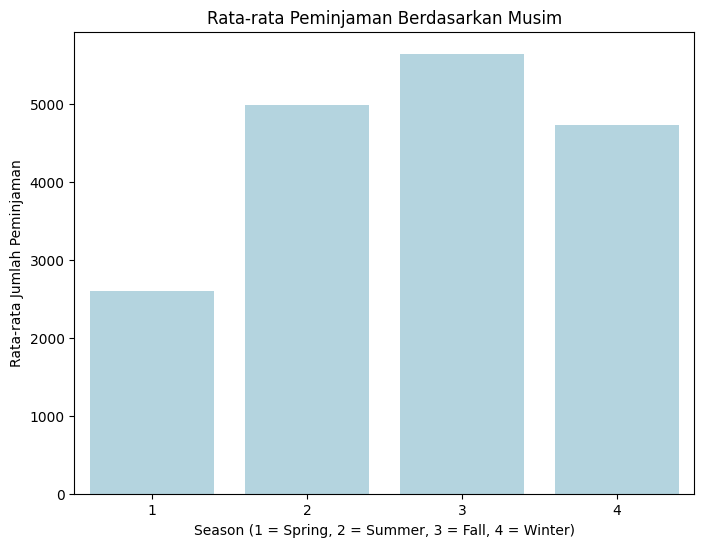

In [8]:
# Rata-rata peminjaman sepeda berdasarkan musim
seasonal_counts = day_data.groupby('season')['cnt'].mean().reset_index()

# Visualisasi rata-rata peminjaman berdasarkan musim
plt.figure(figsize=(8, 6))
sns.barplot(data=seasonal_counts, x='season', y='cnt', color='lightblue')  # Menggunakan warna tunggal
plt.title('Rata-rata Peminjaman Berdasarkan Musim')
plt.xlabel('Season (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

**Insight:**
- Rata-rata peminjaman sepeda tertinggi terjadi pada musim Fall (3), sedangkan musim dengan peminjaman terendah adalah Spring (1).
- Hal ini mungkin disebabkan oleh kondisi cuaca dan suhu yang lebih nyaman di musim Fall dibanding musim lainnya.

### Analisis hour.csv Berdasarkan Musim

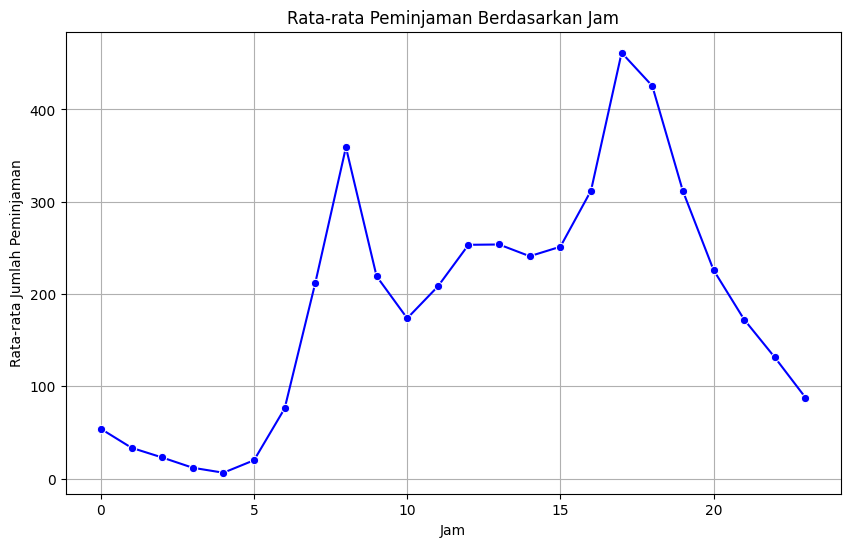

In [9]:
# Rata-rata peminjaman berdasarkan jam
hourly_counts = hour_data.groupby('hr')['cnt'].mean()

# Visualisasi rata-rata peminjaman berdasarkan jam
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='blue')
plt.title('Rata-rata Peminjaman Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid(True)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<Figure size 1500x600 with 0 Axes>

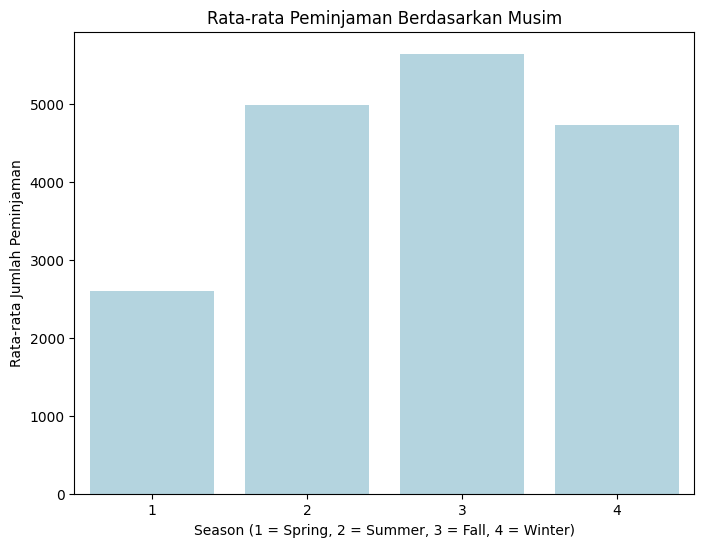

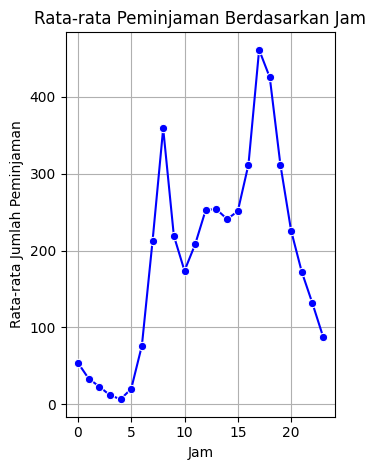

In [14]:
# Gabungkan penjelasan untuk menggambarkan pola secara keseluruhan
plt.figure(figsize=(15, 6))

# Subplot 1: Peminjaman berdasarkan musim
plt.figure(figsize=(8, 6))
sns.barplot(data=seasonal_counts, x='season', y='cnt', color='lightblue')  # Menggunakan warna tunggal
plt.title('Rata-rata Peminjaman Berdasarkan Musim')
plt.xlabel('Season (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

# Subplot 2: Peminjaman berdasarkan jam
plt.subplot(1, 2, 2)
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='blue')
plt.title('Rata-rata Peminjaman Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid(True)

plt.tight_layout()
plt.show()

### Pertanyaan 2:

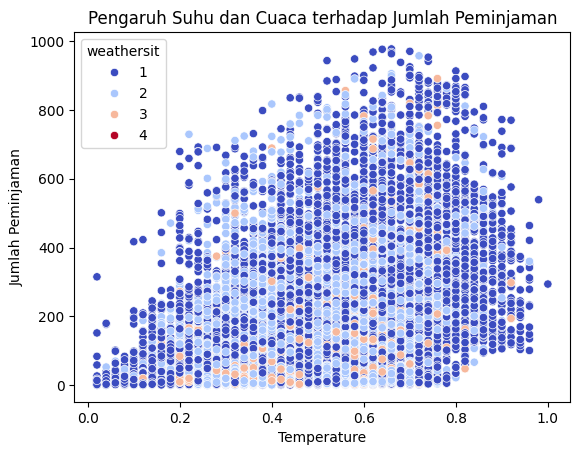

In [10]:
sns.scatterplot(data=hour_data, x='temp', y='cnt', hue='weathersit', palette='coolwarm')
plt.title('Pengaruh Suhu dan Cuaca terhadap Jumlah Peminjaman')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- Cuaca dengan kategori clear atau partly cloudy memiliki jumlah peminjaman tertinggi.
- Semakin tinggi suhu, jumlah peminjaman cenderung meningkat, tetapi menurun pada suhu yang terlalu tinggi (di atas ambang tertentu).

## Analisis Lanjutan (Opsional)

## Conclusion

- Pola peminjaman sepeda lebih tinggi pada cuaca dengan kategori clear atau partly cloudy.
- Cuaca yang clear maupun cloudy memengaruhi jumlah peminjaman sepeda.